## Neighborhood Vacancy Rate Analysis

This notebook focuses on calculating the vacancy score for each Pittsburgh neighborhood. We used data from the Pittsburgh Neighborhood Profiles to find the percentage of vacant housing in each area.

A lower vacancy rate is considered better because it suggests the neighborhood is more stable, more lived in, and likely to be a healthier environment for families.

We normalized the data so that each neighborhood received a score between 0 and 1, where a lower vacancy rate results in a higher core.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

vacancy_df = pd.read_csv("neighborhood_profiles.csv")


# Step 1: Filter for neighborhood-level data only
vacancy_df = vacancy_df[vacancy_df["GeographyType"] == "neighborhood"]

# Step 2: Select relevant columns
vacancy_data = vacancy_df[["NeighborhoodGroup", "Var_2022_vacancy_Per_2"]].copy()
vacancy_data.columns = ["neighborhood", "vacancy_percent"]

# Step 3: Drop missing values
vacancy_data = vacancy_data.dropna()

### Visualizing the Top 10 Most Stable Neighborhoods

Next, we sorted the neighborhoods to find the 10 with the lowest vacancy percentages. These represent the most stable communities in terms of housin.


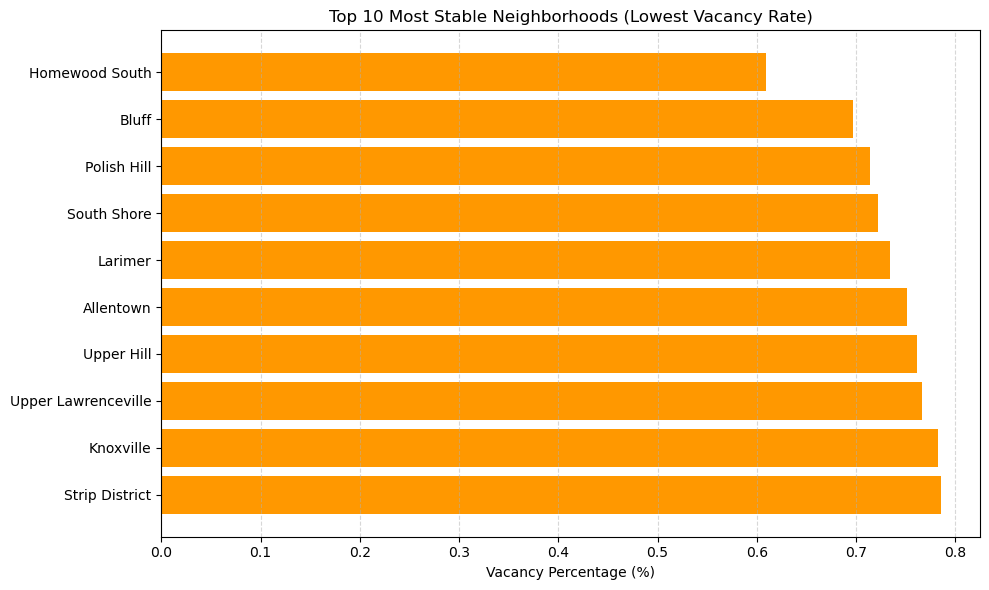

In [4]:
# Step 4: Top 10 neighborhoods with lowest vacancy
lowest_vacancy = vacancy_data.sort_values("vacancy_percent").head(10)

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.barh(lowest_vacancy["neighborhood"], lowest_vacancy["vacancy_percent"], color="#ff9800")
plt.xlabel("Vacancy Percentage (%)")
plt.title("Top 10 Most Stable Neighborhoods (Lowest Vacancy Rate)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Normalizing the Vacancy Data

To fairly compare this metric with other scores like crime and school enrollment, we normalized the vacancy percentages using the formula below.

This gave each neighborhood a score between 0 and 1, where neighborhoods with lower vacancy rates received higher scos.



vacancy_score = 1 - (vacancy_percent - min) / (max - min)

In [5]:
# Step 6: Normalize vacancy score (lower vacancy = higher score)
vacancy_data["vacancy_score"] = 1 - (
    (vacancy_data["vacancy_percent"] - vacancy_data["vacancy_percent"].min()) /
    (vacancy_data["vacancy_percent"].max() - vacancy_data["vacancy_percent"].min())
)

# Preview top 10 neighborhoods with highest vacancy scores
vacancy_data.sort_values("vacancy_score", ascending=False).head(10)


,neighborhood,vacancy_percent,vacancy_score
36,Homewood South,0.609091,1.000000
14,Bluff,0.696970,0.757686
54,Polish Hill,0.714120,0.710396
57,South Shore,0.722222,0.688056
38,Larimer,0.733990,0.655608
7,Allentown,0.751356,0.607725
68,Upper Hill,0.761208,0.580559
69,Upper Lawrenceville,0.766846,0.565011
37,Knoxville,0.782535,0.521751
64,Strip District,0.785714,0.512985


For my part of the project, I focused on the housing stability metric by analyzing vacancy rates in Pittsburgh neighborhoods. I learned how to clean and filter data, sort values, and normalize scores to make fair comparisons.

It was interesting to see how vacancy rates can tell a lot about a neighborhood's stability and livability. I also saw how combining this data with other factors like crime and school enrollment can help paint a more complete picture of what makes a good place to live. Overall, this was a cool experience and helped me better understand how data analysis works in the real world.